# IPL DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ball_data=pd.read_csv(r"C:\Users\lalit\MY_PYTHON_ALL_STUFF\IPL Ball-by-Ball 2008-2020.csv")
match_data=pd.read_csv(r"C:\Users\lalit\MY_PYTHON_ALL_STUFF\IPL Matches 2008-2020.csv")

In [200]:
match_data.tail(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,month
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020,11


# .ISNULL().SUM()

In [5]:
#to check null values and count numbers of that
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
match_data.shape
#it shows number of rows, columns

(816, 17)

In [7]:
ball_data.shape

(193468, 18)

In [8]:
print('matches played so far',match_data.shape[0])

matches played so far 816


yaha par ye bataya gaya hai ki, kitne matches khele gye; 
with the help of .shape['index=' 0 or 1] 
becoz shape mai number of rows and columns hi show hota hai
.shape()=(row,col)

In [9]:
#we can print name of cities where match played

print('cities played at:',match_data['city'].unique())

cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


.unique() set ki tarah kaam karta hai, 
repeated cities ko print nahi karta

In [10]:
print('total number of teams played so far in ipl:',match_data['team1'].unique())

total number of teams played so far in ipl: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


# match_data mai se date wale col se YEAR ko alg karke new col banana

# pd.DatetimeIndex(match_data['date']).year

In [102]:
match_data['Season']=pd.DatetimeIndex(match_data['date']).year
match_data.head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,month
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,4


In [12]:
match_data['month']=pd.DatetimeIndex(match_data['date']).month

In [23]:
match_data.tail(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,month
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020,11
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020,11


# use of GROUP BY

In [101]:
b=match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
b.head(1)

,Season,matches
0,2008,58


1. match_data.groupby(['Season']) == isse data frame ko years/seaons ke acc grouped kr dia gya h

2. match_data['id'].count() == isse total number of matches has count

3.match_data.groupby(['Season'])['id'].count() == isne id's ko count karke, usko grouped by wale function mai ad kar dia
   har saal kitne match hore hai uska sum id's k through kar skte hai
    
4. .reset_index().rename(columns={'id':'matches'}) == id ko matches se rename krke indexing dere
    

Text(0, 0.5, 'number of matches')

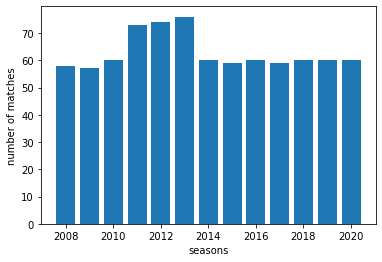

In [36]:
#another way of doing same thing
plt.bar(b['Season'],b['matches'])
plt.xlabel('seasons')
plt.ylabel('number of matches')

# plot bar graph

C:\Users\lalit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Matches played in each season')

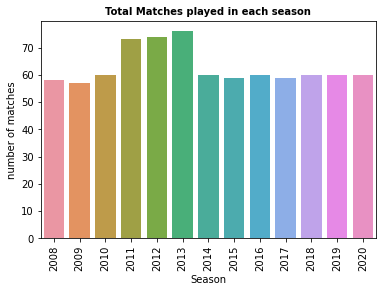

In [16]:
#sns.tocount_number_of_matches(df['columne_name'])
sns.countplot(match_data['Season'])

#using_matplot_lib
plt.xticks(rotation=90,fontsize=10)
#.xticks=x ki values ko rotation =45 degree mai tilt kar dia

plt.yticks(fontsize=10)
plt.xlabel('Season',fontsize=10)
plt.ylabel('number of matches',fontsize=10)
plt.title('Total Matches played in each season',fontsize=10,fontweight='bold')

# merging 2 column from two diff data frame

In [44]:
season_data=match_data[['id','Season']].merge(ball_data,left_on='id',right_on='id',how='left').drop('id',axis=1)
season_data.head(2)

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [45]:
#this is the another method of merging data frames
c=pd.merge(ball_data,match_data,on='id',how='left')
c.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,month
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,4
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,4


# trend of runs scored each season

<AxesSubplot:xlabel='Season'>

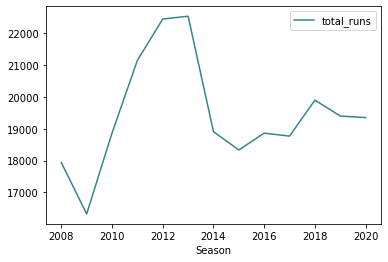

In [66]:
sns.lineplot(data=p,palette='crest')

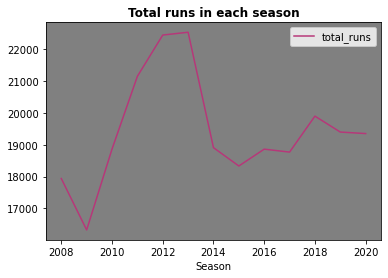

In [58]:
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')

plt.axes(facecolor='grey')
sns.lineplot(data=p,palette='magma')
plt.title('Total runs in each season',fontsize=12,fontweight='bold')
plt.show()

In [95]:
a=season.drop(['no of matches'],axis=1).reset_index()
a.head(1)

,Season,total_runs
0,2008,17937


In [92]:
b.head(1)

,Season,matches
0,2008,58


# merge a and b 

In [99]:
c=pd.merge(a,b,on='Season').set_index('Season')
c.head(1)

,total_runs,matches
Season,,
2008,17937,58


In [100]:
c['runs per match']=c['total_runs']/c['matches']
c.head(1)

,total_runs,matches,runs per match
Season,,,
2008,17937,58,309.258621


# step:1- kis team ne kitne toss jite hai

In [107]:
toss=match_data['toss_winner'].value_counts()
toss

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

## step:2- axes ko plot karne ka trika

# plot bana do jisme toss.index ka kaam team ke name print karne mai h

Text(0.5, 0, 'number of tosses')

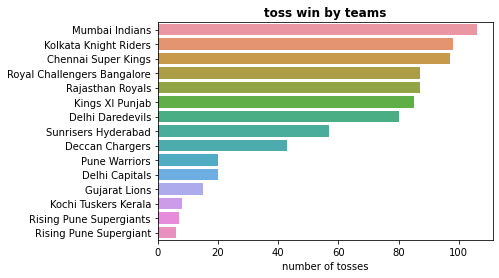

In [120]:
sns.barplot(x=toss,y=toss.index)
plt.title('toss win by teams',fontweight='bold')
plt.xlabel('number of tosses')

# har season total tosses mai se fielding kitni bar liya and batting kitni bar liya 
uska count and plot

<AxesSubplot:xlabel='Season', ylabel='count'>

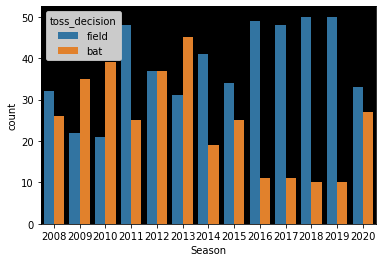

In [126]:
plt.axes(facecolor='black')
sns.countplot(x='Season',hue='toss_decision',data=match_data)

In [131]:
result_by=match_data['result'].value_counts()
result_by

wickets    435
runs       364
tie         13
Name: result, dtype: int64

C:\Users\lalit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result'>

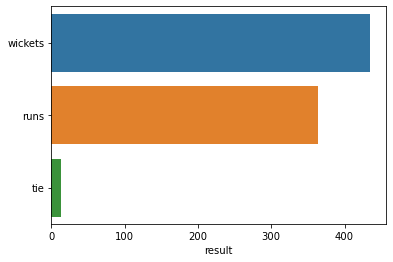

In [134]:
sns.barplot(result_by,result_by.index)

# wo venue jaha par first batting krke jyada jeeta gaya hai

In [135]:
match_data.venue[match_data.result=='wickets'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [137]:
match_data.venue[match_data.result!='wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [138]:
match_data.venue[match_data.toss_winner=='Kings XI Punjab'][match_data.winner=='Kings XI Punjab'].mode()

0    Punjab Cricket Association Stadium, Mohali
Name: venue, dtype: object

In [139]:
match_data.venue[match_data.toss_winner=='Chennai Super Kings'][match_data.winner=='Chennai Super Kings'].mode()

0    MA Chidambaram Stadium, Chepauk
Name: venue, dtype: object

In [140]:
match_data.venue[match_data.toss_winner=='Mumbai Indians'][match_data.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
Name: venue, dtype: object

# best chassing teams

In [141]:
match_data.winner[match_data.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

# best defending team

In [142]:
match_data.winner[match_data.result=='runs'].mode()

0    Mumbai Indians
Name: winner, dtype: object

# does winning toss means winning match

C:\Users\lalit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

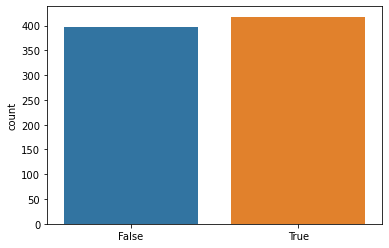

In [144]:
tosss=match_data['toss_winner']==match_data['winner']
sns.countplot(tosss)

# which team won most based on their decision

C:\Users\lalit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toss_decision', ylabel='count'>

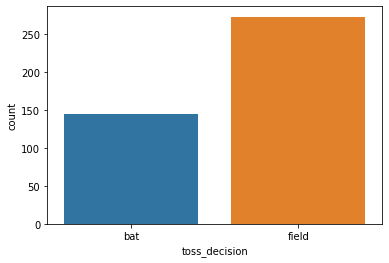

In [148]:
sns.countplot(match_data.toss_decision[match_data.toss_winner==match_data.winner])


# how raina got out?

In [150]:
player=(ball_data['batsman']=='SK Raina')
df_raina=ball_data[player]


In [153]:
x=df_raina['dismissal_kind'].value_counts()
x

caught               110
bowled                16
run out               12
caught and bowled      8
stumped                8
lbw                    6
Name: dismissal_kind, dtype: int64

<AxesSubplot:ylabel='dismissal_kind'>

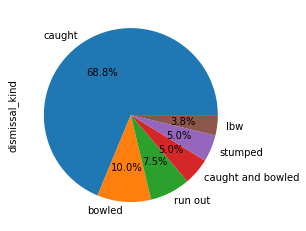

In [160]:
x.plot.pie(autopct='%1.1f%%')

## how dhoni got out?

<AxesSubplot:ylabel='dismissal_kind'>

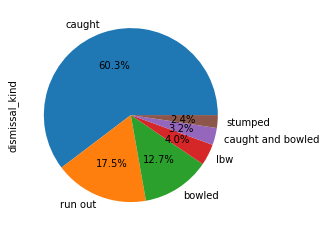

In [171]:
ms=(ball_data['batsman']=='MS Dhoni')
msd=ball_data[ms]
Dhoni=msd['dismissal_kind'].value_counts()
Dhoni.plot.pie(autopct='%1.1f%%')

In [180]:
df_raina.head(1)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


In [179]:
#jaha jaha four mara hai wo sara df dedo
fours=df_raina[df_raina['batsman_runs']==4]
fours.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
355,335983,1,8,2,SK Raina,MEK Hussey,IK Pathan,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


In [176]:
print(count(df_raina,1))

1666


In [182]:
print("total runs scored by raina from 4's",len(df_raina[df_raina['batsman_runs']==4])*4)

total runs scored by raina from 4's 1972


In [ ]:
#yehi sab ek sarh karne k liye function ka use kar liya upr

In [183]:
#dataframe,variable(jaha par hum batsman_runs rkhenge)
def count(df_raina,runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs
              

In [185]:
print("runs scored from 1's",count(df_raina,1))
print("runs scored from 2's",count(df_raina,2))
print("runs scored from 3's",count(df_raina,3))
print("runs scored from 4's",count(df_raina,4))
print("runs scored from 6's",count(df_raina,6))

runs scored from 1's 1666
runs scored from 2's 528
runs scored from 3's 33
runs scored from 4's 1972
runs scored from 6's 1164


# match which won by bigest win by run margin

In [186]:
match_data[match_data['result_margin']==match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,month
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017,5


# max runs scored by batsman

In [189]:
runs=ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
y

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'V Kohli'),
  Text(1, 0, 'SK Raina'),
  Text(2, 0, 'DA Warner'),
  Text(3, 0, 'RG Sharma'),
  Text(4, 0, 'S Dhawan'),
  Text(5, 0, 'AB de Villiers'),
  Text(6, 0, 'CH Gayle'),
  Text(7, 0, 'MS Dhoni'),
  Text(8, 0, 'RV Uthappa'),
  Text(9, 0, 'G Gambhir')])

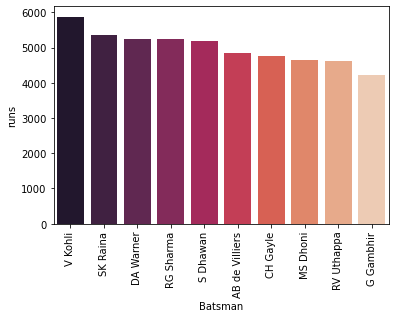

In [197]:
sns.barplot(x=y['Batsman'],y=y['runs'],palette='rocket')
plt.xticks(rotation=90)

# plot max MOM award winning players

<AxesSubplot:>

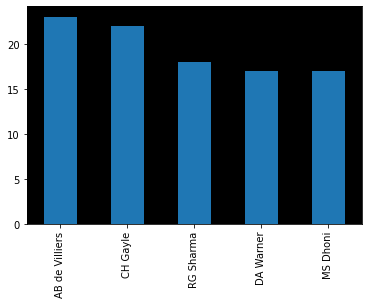

In [199]:
plt.axes(facecolor='black')
match_data.player_of_match.value_counts()[:5].plot(kind='bar')